<a href="https://colab.research.google.com/github/ravindu374/Hand-Written-Digits-Classification/blob/main/Handwritten_Digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

train_images_file_path = '/content/drive/MyDrive/archive/train_images.npy'
train_labels_file_path = '/content/drive/MyDrive/archive/train_labels.npy'
test_images_file_path = '/content/drive/MyDrive/archive/test_images.npy'
test_labels_file_path = '/content/drive/MyDrive/archive/test_labels.npy'

train_images = np.load(train_images_file_path)
train_labels = np.load(train_labels_file_path)
train_images,val_images,train_labels,val_labels = train_test_split(train_images,train_labels,test_size=0.17,random_state=42)
test_images = np.load(test_images_file_path)
test_labels = np.load(test_labels_file_path)

In [3]:
print("train_images shape =",train_images.shape)
print("train_labels shape =",train_labels.shape)

train_images shape = (49800, 28, 28)
train_labels shape = (49800,)


In [4]:
print("validation_images shape =",val_images.shape)
print("validation shape =",val_labels.shape)

validation_images shape = (10200, 28, 28)
validation shape = (10200,)


In [5]:
print("test_images shape =",test_images.shape)
print("test_labels shape =",test_labels.shape)

test_images shape = (10000, 28, 28)
test_labels shape = (10000,)


### Dataset Visualization

In [6]:
import matplotlib.pyplot as plt
def display_images(*args):
    num_images = len(args)
    num_cols = min(3, num_images)  # Max 3 images per row
    num_rows = int(np.ceil(num_images / num_cols))

    plt.figure(figsize=(5, 5))

    for i, idx in enumerate(args):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.title(f'Label = {train_labels[idx]}', fontsize=14)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

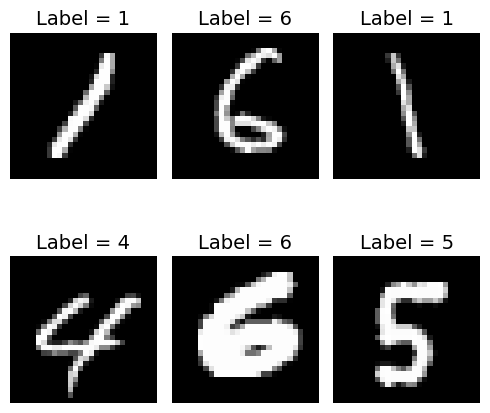

In [7]:
display_images(100,200,300,355,501,590)

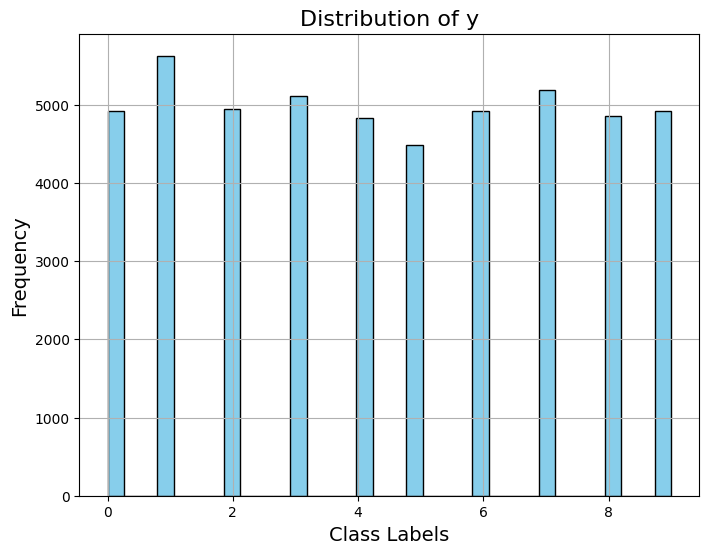

In [8]:
#plotting histogram of y
def plot_histogram(y):
  plt.figure(figsize=(8,6))
  plt.hist(y,bins='auto',color='skyblue', edgecolor='black')
  plt.title('Distribution of y', fontsize=16)
  plt.xlabel('Class Labels', fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

plot_histogram(train_labels)

In [9]:
x_train = train_images.reshape(-1, 28, 28, 1)
x_val = val_images.reshape(-1,28,28,1)
x_test = test_images.reshape(-1,28,28,1)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(49800, 28, 28, 1)
(10200, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
#Normalization
x_train = train_images.astype("float32")/255.0
x_val = val_images.astype("float32")/255.0
x_test = test_images.astype("float32")/255.0

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

model = models.Sequential()


In [13]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(layers.MaxPooling2D(2,2))

In [15]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [16]:
model.add(layers.MaxPooling2D(2,2))

In [17]:
model.add(layers.Flatten())

In [18]:
model.add(layers.Dense(128, activation = 'relu'))

In [19]:
model.add(layers.Dropout(0.5))

In [20]:
model.add(layers.Dense(10, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


 Training with Adam, learning rate = 0.001
Epoch 1/20
779/779 - 11s - 14ms/step - accuracy: 0.9139 - loss: 0.2796 - val_accuracy: 0.9787 - val_loss: 0.0690
Epoch 2/20
779/779 - 2s - 3ms/step - accuracy: 0.9691 - loss: 0.1023 - val_accuracy: 0.9852 - val_loss: 0.0493
Epoch 3/20
779/779 - 3s - 4ms/step - accuracy: 0.9790 - loss: 0.0708 - val_accuracy: 0.9860 - val_loss: 0.0448
Epoch 4/20
779/779 - 3s - 3ms/step - accuracy: 0.9823 - loss: 0.0589 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 5/20
779/779 - 3s - 3ms/step - accuracy: 0.9848 - loss: 0.0512 - val_accuracy: 0.9895 - val_loss: 0.0336
Epoch 6/20
779/779 - 3s - 4ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9912 - val_loss: 0.0344
Epoch 7/20
779/779 - 3s - 3ms/step - accuracy: 0.9876 - loss: 0.0383 - val_accuracy: 0.9909 - val_loss: 0.0322
Epoch 8/20
779/779 - 2s - 3ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9906 - val_loss: 0.0340
Epoch 9/20
779/779 - 3s - 4ms/step - accuracy: 0.9900 - loss: 0.03

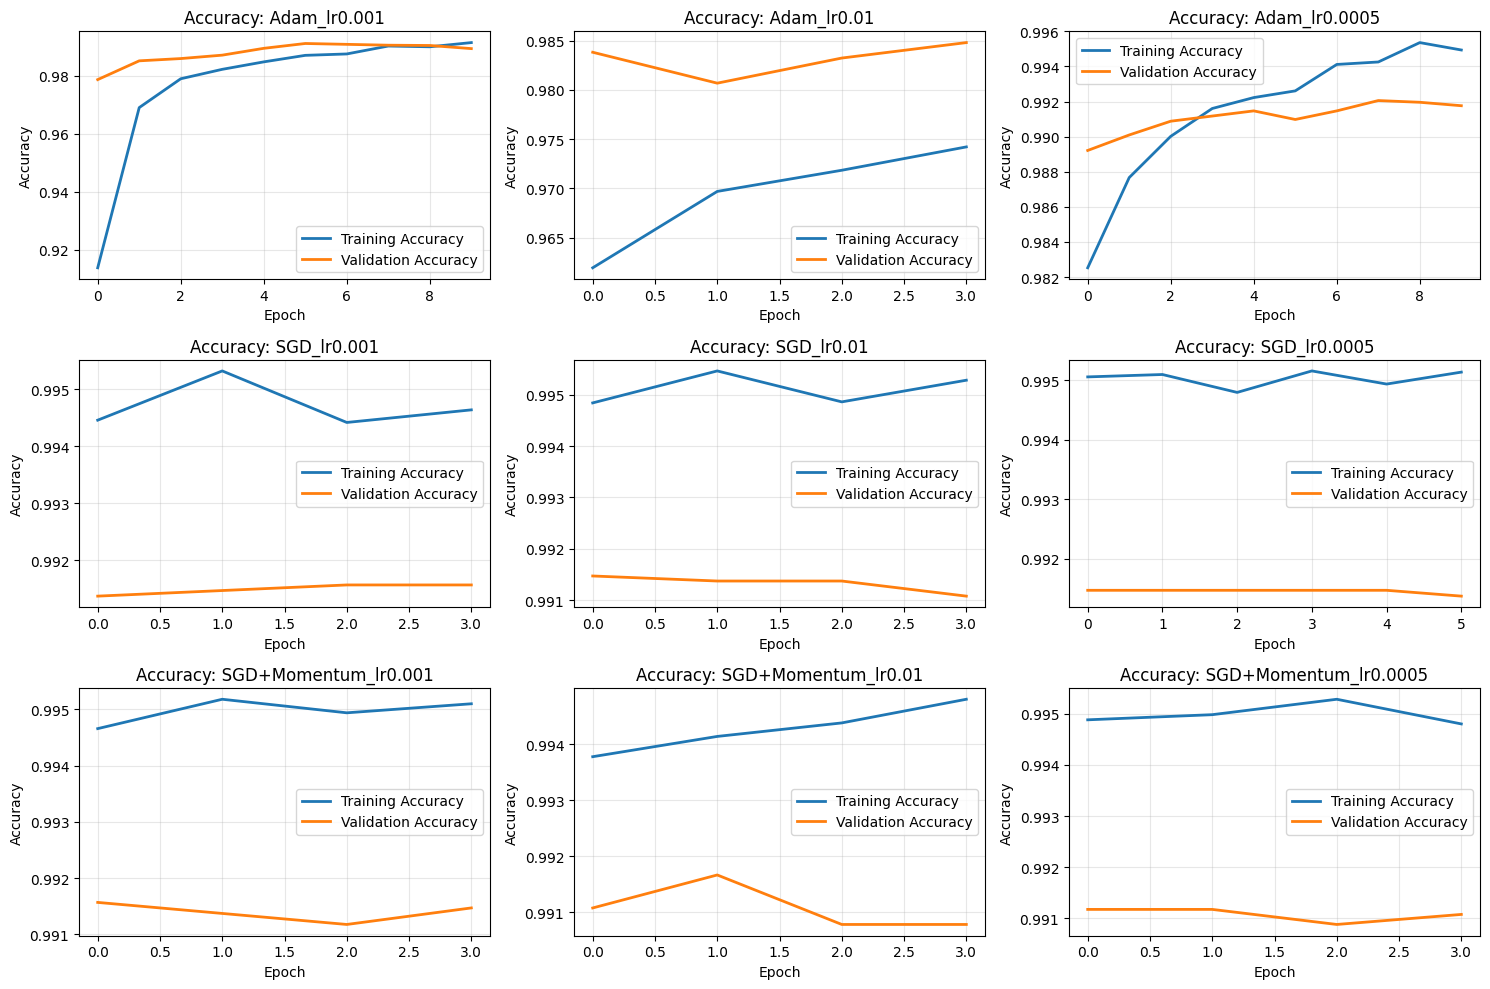

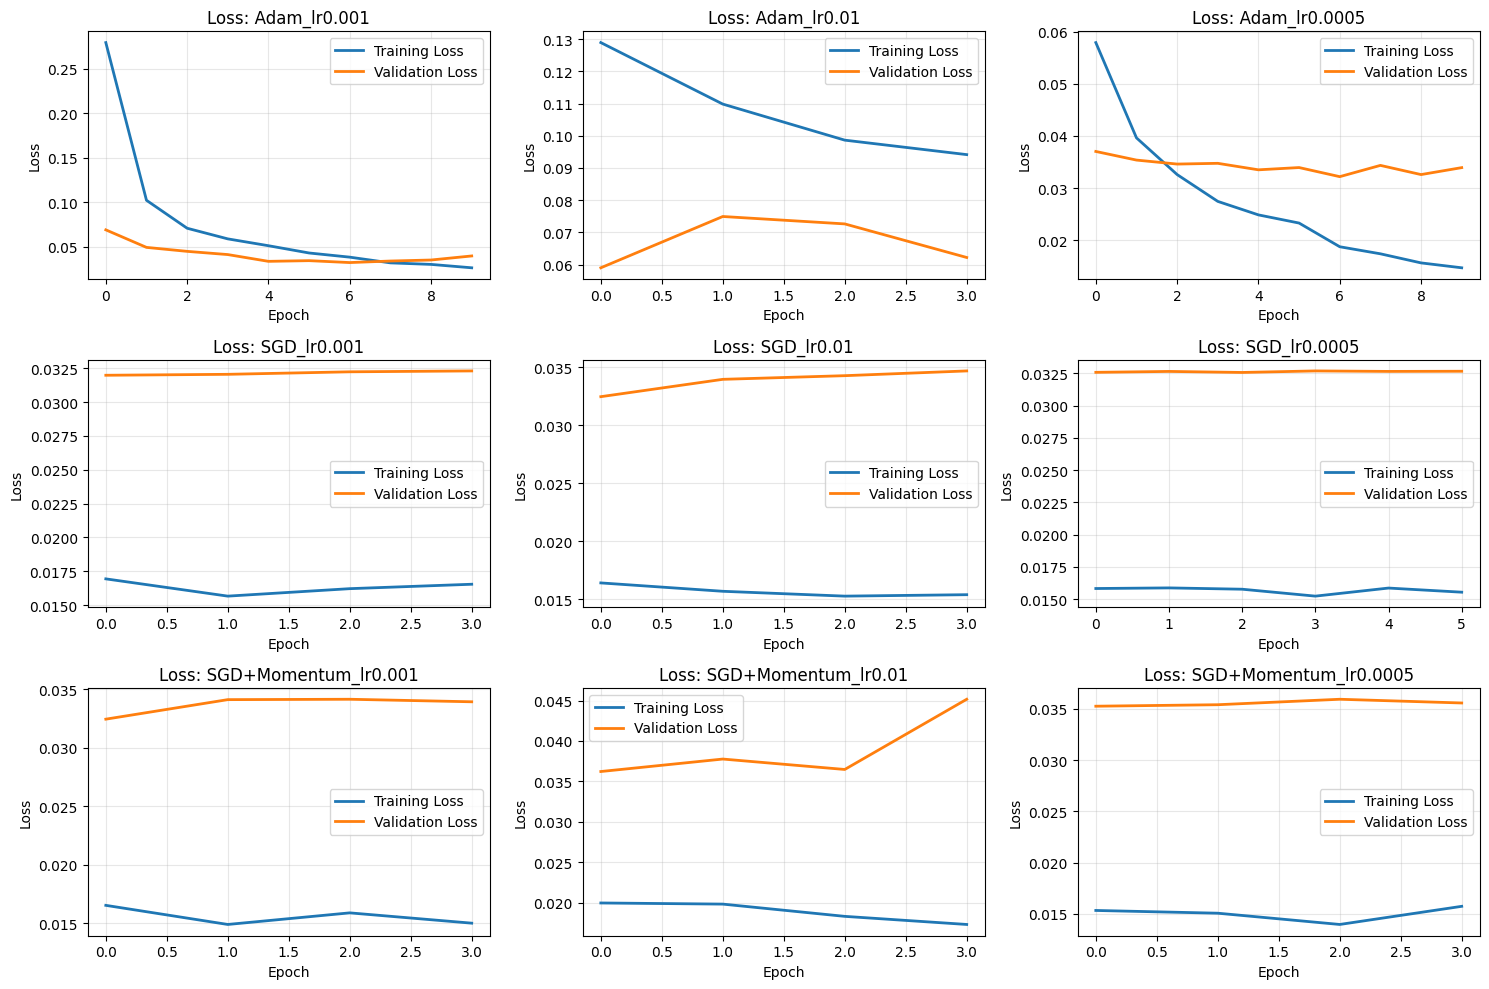

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.0005]
optimizer = {
    'Adam': lambda lr: optimizers.Adam(learning_rate=lr),
    'SGD': lambda lr: optimizers.SGD(learning_rate=lr),
    'SGD+Momentum': lambda lr: optimizers.SGD(learning_rate=lr, momentum=0.9)
}
histories = {}

# Train model for each learning rate
for opt_name, opt_func in optimizer.items():
    for lr in learning_rates:
        print(f"\n Training with {opt_name}, learning rate = {lr}")

        model.compile(
            optimizer=opt_func(lr),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        # Early stopping when val_loss doesn't improve
        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        history = model.fit(
            x_train, train_labels,
            epochs=20,
            validation_data=(x_val, val_labels),
            batch_size=64,
            callbacks=[early_stop],
            verbose=2
        )

        # Store history with optimizer name and learning rate as key
        key = f"{opt_name}_lr{lr}"
        histories[key] = history.history

# Plot Accuracy: Training vs Validation for each configuration
plt.figure(figsize=(15, 10))

for i, (key, history) in enumerate(histories.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'Accuracy: {key}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add gap indication if overfitting
    if len(history['accuracy']) > 0 and len(history['val_accuracy']) > 0:
        final_train_acc = history['accuracy'][-1]
        final_val_acc = history['val_accuracy'][-1]
        gap = final_train_acc - final_val_acc
        if gap > 0.1:  # Significant gap indicates overfitting
            plt.text(0.5, 0.1, f'Overfit gap: {gap:.3f}',
                    transform=plt.gca().transAxes, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Plot Loss: Training vs Validation for each configuration
plt.figure(figsize=(15, 10))

for i, (key, history) in enumerate(histories.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'Loss: {key}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add gap indication if overfitting
    if len(history['loss']) > 0 and len(history['val_loss']) > 0:
        final_train_loss = history['loss'][-1]
        final_val_loss = history['val_loss'][-1]
        gap = final_val_loss - final_train_loss
        if gap > 0.1:  # Significant gap indicates overfitting
            plt.text(0.5, 0.1, f'Overfit gap: {gap:.3f}',
                    transform=plt.gca().transAxes, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_accuracy = model.evaluate(x_test, test_labels, batch_size=128, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate precision and recall separately
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions
y_pred = model.predict(x_test, batch_size=128)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
precision = precision_score(test_labels, y_pred_classes, average='weighted')
recall = recall_score(test_labels, y_pred_classes, average='weighted')
f1 = f1_score(test_labels, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9901 - loss: 0.0337
Test Loss: 0.0263
Test Accuracy: 0.9928
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Precision: 0.9928
Recall: 0.9928
F1-Score: 0.9928


In [24]:
y_prediction_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [25]:
from sklearn.metrics import confusion_matrix

y_prediction = np.argmax(y_prediction_prob, axis=1)
cm = confusion_matrix(test_labels, y_prediction, normalize='true')

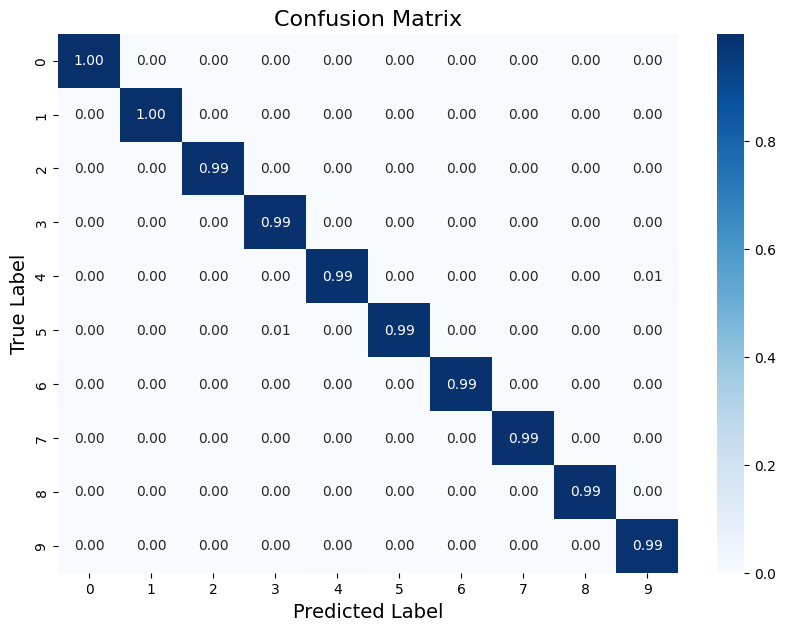

In [26]:
import seaborn as sns
# Plot confusion matrix using Seaborn
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

# Define class labels (0 to 9)
labels = [str(i) for i in range(10)]

# Plot the confusion matrix
plot_confusion_matrix(cm, labels)